In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn import cross_validation, grid_search
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python3/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
image_data = pd.read_csv('train_2.csv', header=0)

In [3]:
images = image_data.iloc[0:42000,1:]
labels = image_data.iloc[0:42000,:1]
print(images)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0       0   
11          0       0       

In [4]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=1)

(array([ 636.,    8.,    8.,   11.,   10.,    4.,    5.,   10.,   13.,   79.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

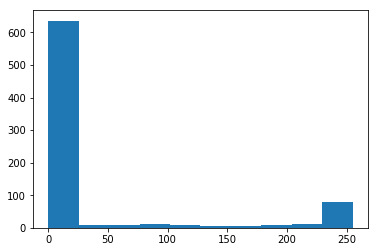

In [5]:
i = 1
plt.hist(train_images.iloc[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/pandas/core/frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


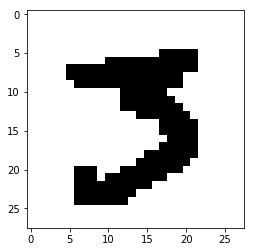

In [6]:
train_images[train_images > 0] = 1
img = train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')

In [7]:
parameters_grid = {'C': [1, 3, 5, 7, 9], 'gamma': [1, 0.1, 0.01, 0.009, 0.001]}

In [8]:
cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 10, test_size = 0.2, random_state = 1)

In [9]:
grid_cv = grid_search.GridSearchCV(svm.SVC(), parameters_grid, scoring = 'accuracy', cv = cv)

In [ ]:
grid_cv.fit(train_images, train_labels.values.ravel())

In [ ]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

In [ ]:
test_data = pd.read_csv('test_2.csv', header=0)
test_data[test_data > 0] = 1

In [ ]:
predicted_data = grid_cv.predict(test_data[0:28000])

In [ ]:
test_data.index = np.arange(1, len(test_data) + 1)
dataframe = pd.DataFrame({'ImageId': test_data.index, 'Label':predicted_data}) 
pd.DataFrame.to_csv(dataframe,"prediction_3.csv", index=False)